In [78]:
from mplsoccer import Pitch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsbombpy import sb
from mplsoccer import Sbopen
from matplotlib.patches import Circle
from matplotlib.patches import FancyArrowPatch
import gc


In [80]:
parser = Sbopen()
df_competition = parser.competition()
df_matches = parser.match(competition_id=55, season_id=282)
match_id=3943043
df_events, df_related, df_freeze, df_tactics = parser.event(3943043)
parser.event(3788741)
#get team names
team1, team2 = df_events.team_name.unique()
df_events.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'match_id', 'type_id', 'type_name', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'tactics_formation', 'player_id', 'player_name',
       'position_id', 'position_name', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle', 'pass_height_id',
       'pass_height_name', 'end_x', 'end_y', 'body_part_id', 'body_part_name',
       'sub_type_id', 'sub_type_name', 'x', 'y', 'outcome_id', 'outcome_name',
       'under_pressure', 'out', 'counterpress', 'pass_switch',
       'dribble_nutmeg', 'aerial_won', 'pass_cross', 'technique_id',
       'technique_name', 'pass_no_touch', 'foul_won_defensive', 'off_camera',
       'pass_assisted_shot_id', 'pass_shot_assist', 'shot_one_on_one',
       'shot_statsbomb_xg', 'shot_key_pass_id', 'goalkeeper_position_id',
       'goalkeeper_position_name', 'end_z',

In [34]:
df_events.player_name.unique()

array([nan, 'Kobbie Mainoo', 'Jordan Pickford', 'Bukayo Saka',
       'Unai Simón Mendibil', 'Robin Aime Robert Le Normand',
       'Daniel Carvajal Ramos', 'Jude Bellingham', 'Declan Rice',
       'Daniel Olmo Carvajal', 'Álvaro Borja Morata Martín',
       'Lamine Yamal Nasraoui Ebana', 'Marc Guehi', 'Phil Foden',
       'Rodrigo Hernández Cascante', 'Aymeric Laporte', 'Kyle Walker',
       'Luke Shaw', 'Harry Kane', 'John Stones',
       'Nicholas Williams Arthuer', 'Marc Cucurella Saseta',
       'Fabián Ruiz Peña', 'Martín Zubimendi Ibáñez', 'Ollie Watkins',
       'Mikel Oyarzabal Ugarte', 'Cole Palmer',
       'José Ignacio Fernández Iglesias', 'Ivan Toney',
       'Mikel Merino Zazón'], dtype=object)

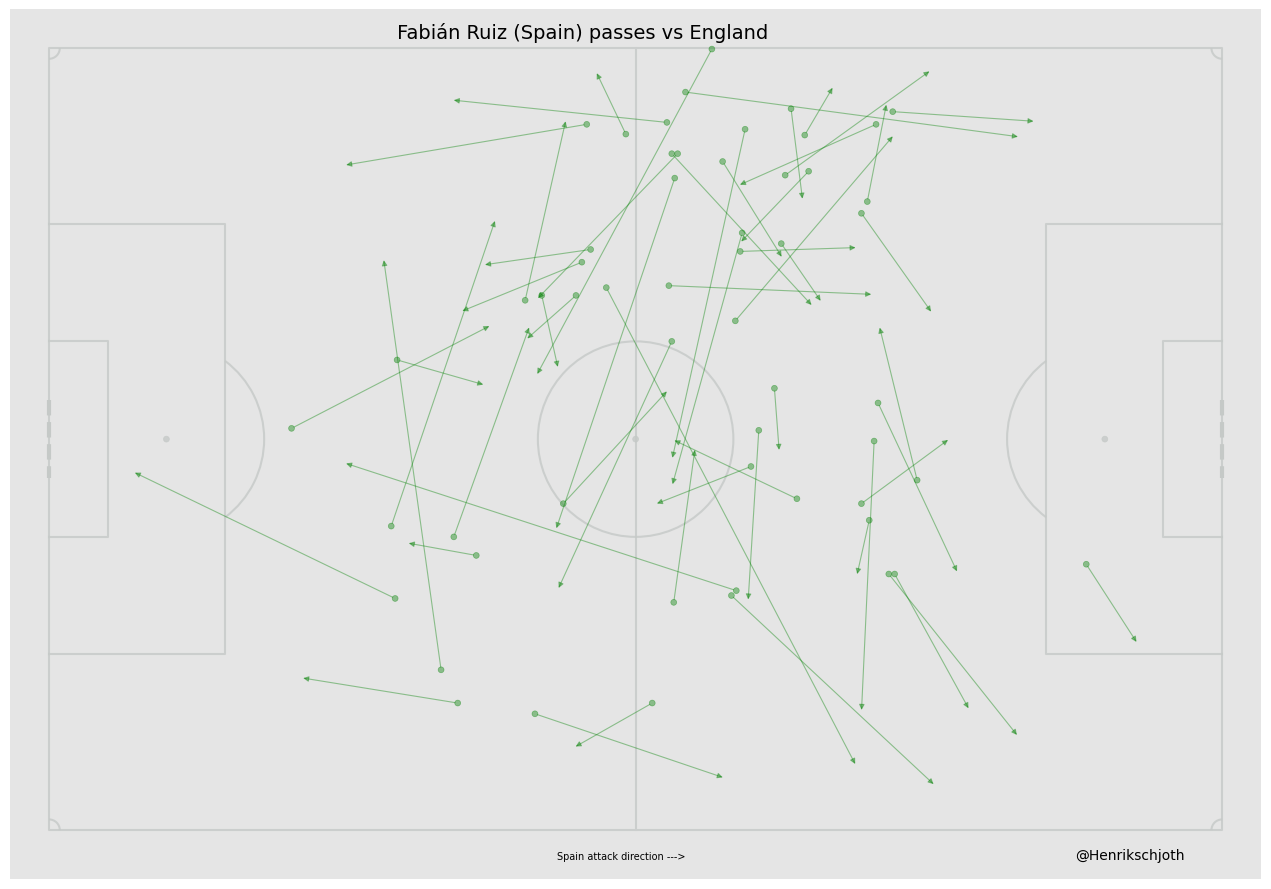

In [98]:
# Aim to create visual of all Fabian Ruiz passes
passes = df_events[df_events['type_name'] == 'Pass']
passes = passes[['player_id', 'player_name', 'period', 'minute', 'x', 'y', 'end_x', 'end_y', 
                 'pass_recipient_id', 'pass_recipient_name', 'team_name', 'outcome_id', 
                 'outcome_name', 'team_id', 'pass_length']]

plt.style.use('ggplot')
# Fikser pitch-spesifikasjoner
pitch = Pitch(pitch_type='statsbomb', axis=False, label=False, line_color='#c5c9c7', 
              pad_bottom=5, spot_type='circle', spot_scale=0.0025, linewidth=1.5, 
              linestyle='-', corner_arcs=True, 
              line_alpha=0.8, goal_linestyle='--', half=False)
fig, ax = pitch.draw(figsize=(16, 9))
# StatsBomb pitch-dimensjoner
pitchWidthY = 80  
pitchLengthX = 120  

# Plotter hver pasning
for i, row in passes.iterrows():
    x = row['x']
    y = row['y']
    end_x = row['end_x']
    end_y = row['end_y']
    circleSize = 0.3
    dx = end_x - x
    dy = end_y - y
    color = 'red'
    alpha = 0.4
    width = 0.8
    # Sjekk om pasningen er fra Fabián Ruiz Peña
    if row['player_name'] == 'Fabián Ruiz Peña':
            if pd.isnull(row['outcome_name']):  # Sjekker om pasningen er vellykket
                color = 'green'
                circle = Circle((x, y), circleSize, color=color, alpha=alpha)
                passArrow = FancyArrowPatch((x, y), (end_x, end_y), 
                                            color=color, alpha=alpha, linewidth=width, 
                                            arrowstyle='-|>', mutation_scale=8)
                ax.add_patch(circle)
                ax.add_patch(passArrow)
# Add title
ax.text(35, -1,' Fabián Ruiz (Spain) passes vs ' +   team2, fontsize=14, color='black')
fontsize=7 
color='black'
ax.text(52, 83, team1 + ' attack direction --->', fontsize=fontsize, color=color)
#ax.text(62, 78, '-  Data from statsbomb', fontsize=fontsize, color=color)
ax.text(105, 83, '@Henrikschjoth', fontsize=10, color=color)


#Saving image
fig.savefig(r'C:\Users\henri\Desktop\Ballprog\allpasses_playerx.jpg', dpi=300)


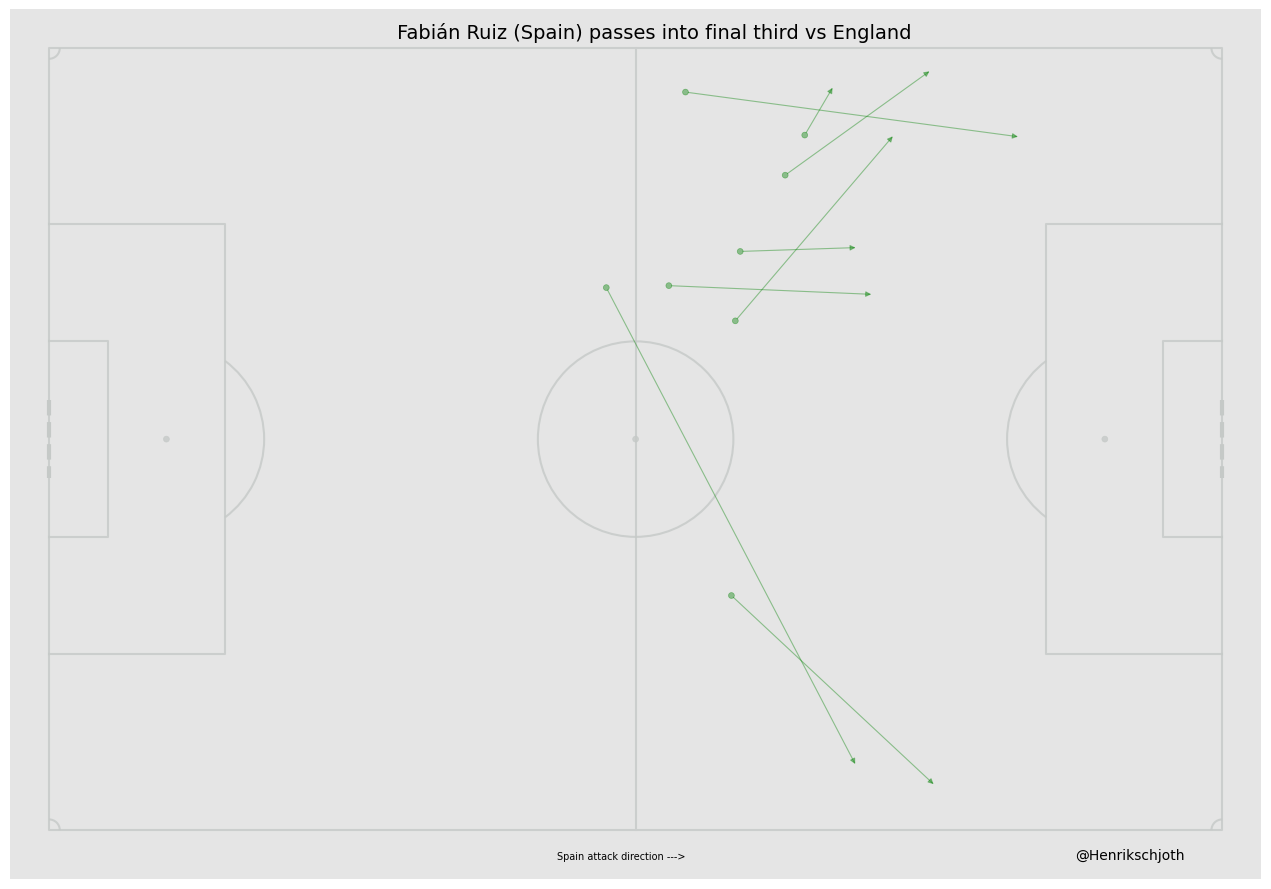

In [100]:
# Create visual of Fabian Ruiz finalthird passes
passes = df_events[df_events['type_name'] == 'Pass']
passes = passes[['player_id', 'player_name', 'period', 'minute', 'x', 'y', 'end_x', 'end_y', 
                 'pass_recipient_id', 'pass_recipient_name', 'team_name', 'outcome_id', 
                 'outcome_name', 'team_id', 'pass_length']]

plt.style.use('ggplot')
# Fikser pitch-spesifikasjoner
pitch = Pitch(pitch_type='statsbomb', axis=False, label=False, line_color='#c5c9c7', 
              pad_bottom=5, spot_type='circle', spot_scale=0.0025, linewidth=1.5, 
              linestyle='-', corner_arcs=True, 
              line_alpha=0.8, goal_linestyle='--', half=False)
fig, ax = pitch.draw(figsize=(16, 9))
# StatsBomb pitch-dimensjoner
pitchWidthY = 80  
pitchLengthX = 120  

# Plotter hver pasning
for i, row in passes.iterrows():
    x = row['x']
    y = row['y']
    end_x = row['end_x']
    end_y = row['end_y']
    circleSize = 0.3
    dx = end_x - x
    dy = end_y - y
    color = 'red'
    alpha = 0.4
    width = 0.8
    final_third_pass = x < 80 and end_x >= 80

    # Sjekk om pasningen er fra Fabián Ruiz Peña
    if row['player_name'] == 'Fabián Ruiz Peña':
        if final_third_pass:  
            if pd.isnull(row['outcome_name']):  # Sjekker om pasningen er vellykket
                color = 'green'
                circle = Circle((x, y), circleSize, color=color, alpha=alpha)
                passArrow = FancyArrowPatch((x, y), (end_x, end_y), 
                                            color=color, alpha=alpha, linewidth=width, 
                                            arrowstyle='-|>', mutation_scale=8)
                ax.add_patch(circle)
                ax.add_patch(passArrow)
# Add title
ax.text(35, -1,' Fabián Ruiz (Spain) passes into final third vs ' +   team2, fontsize=14, color='black')
fontsize=7 
color='black'
ax.text(52, 83, team1 + ' attack direction --->', fontsize=fontsize, color=color)
#ax.text(62, 78, '-  Data from statsbomb', fontsize=fontsize, color=color)
ax.text(105, 83, '@Henrikschjoth', fontsize=10, color=color)


#Saving image
fig.savefig(r'C:\Users\henri\Desktop\Ballprog\passes_playerx.jpg', dpi=300)
